[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/docs/getting_started.ipynb)

In [1]:
# !pip install pygenomeviz
# !apt install ncbi-blast+ mummer mmseqs2

## 1. Basic Content

### 1-1. Track

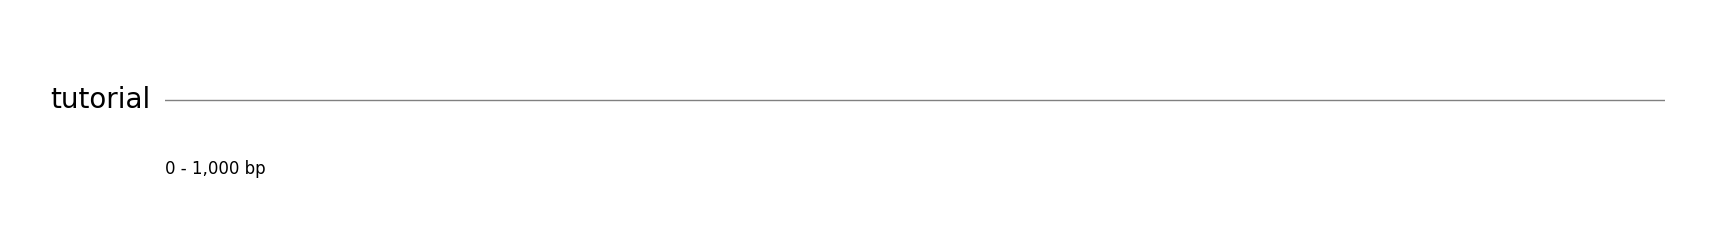

In [2]:
from pygenomeviz import GenomeViz

gv = GenomeViz()

track = gv.add_feature_track("tutorial", 1000)
track.add_sublabel()

fig = gv.plotfig()
# gv.savefig("example.png")
# gv.savefig_html("example.html")

### 1-2. Features

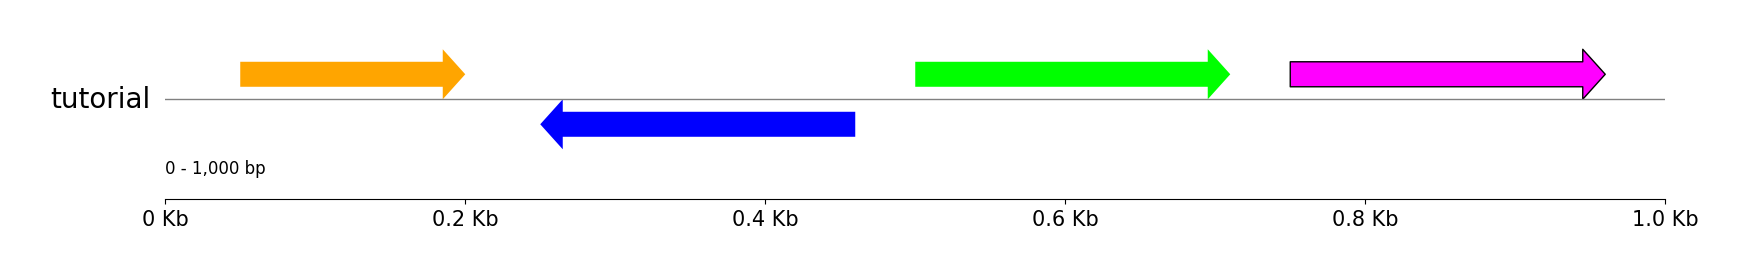

In [3]:
from pygenomeviz import GenomeViz

gv = GenomeViz()
gv.set_scale_xticks(ymargin=0.5)

track = gv.add_feature_track("tutorial", 1000)
track.add_sublabel()

# Add features to track
track.add_feature(50, 200, 1)
track.add_feature(250, 460, -1, fc="blue")
track.add_feature(500, 710, 1, fc="lime")
track.add_feature(750, 960, 1, fc="magenta", lw=1.0)

fig = gv.plotfig()

### 1-3. Styled Features

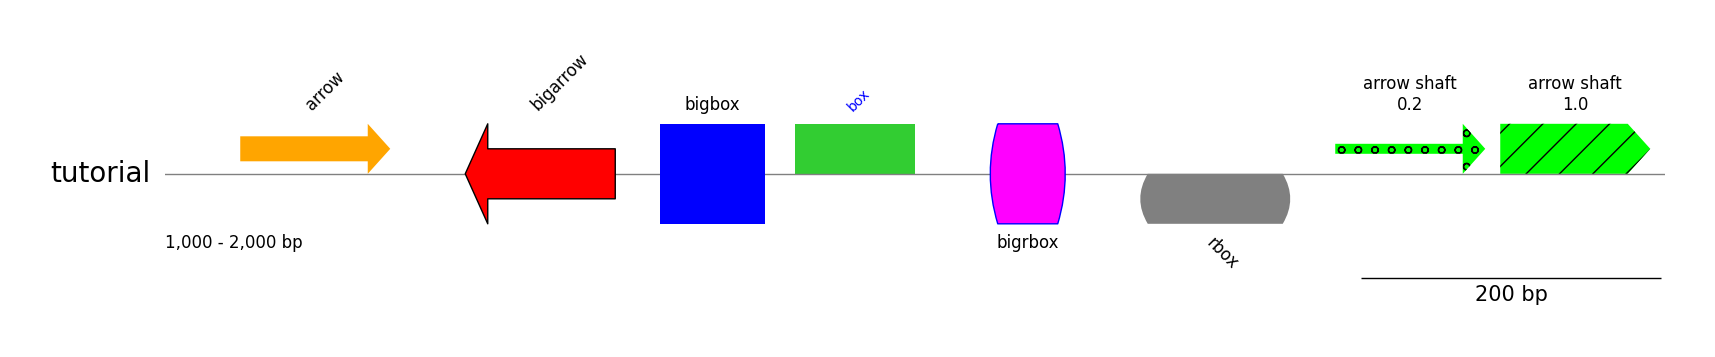

In [4]:
from pygenomeviz import GenomeViz

gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

track = gv.add_feature_track("tutorial", (1000, 2000))
track.add_sublabel()

# Add styled features
track.add_feature(1050, 1150, 1, label="arrow")
track.add_feature(1200, 1300, -1, plotstyle="bigarrow", label="bigarrow", fc="red", lw=1)
track.add_feature(1330, 1400, 1, plotstyle="bigbox", label="bigbox", fc="blue", text_kws=dict(rotation=0, hpos="center"))
track.add_feature(1420, 1500, 1, plotstyle="box", label="box", fc="limegreen", text_kws=dict(size=10, color="blue"))
track.add_feature(1550, 1600, 1, plotstyle="bigrbox", label="bigrbox", fc="magenta", ec="blue", lw=1, text_kws=dict(rotation=0, vpos="bottom", hpos="center"))
track.add_feature(1650, 1750, -1, plotstyle="rbox", label="rbox", fc="grey", text_kws=dict(rotation=-45, vpos="bottom"))
track.add_feature(1780, 1880, 1, fc="lime", hatch="o", arrow_shaft_ratio=0.2, label="arrow shaft\n0.2", text_kws=dict(rotation=0, hpos="center"))
track.add_feature(1890, 1990, 1, fc="lime", hatch="/", arrow_shaft_ratio=1.0, label="arrow shaft\n1.0", text_kws=dict(rotation=0, hpos="center"))

fig = gv.plotfig()

### 1-4. Segments

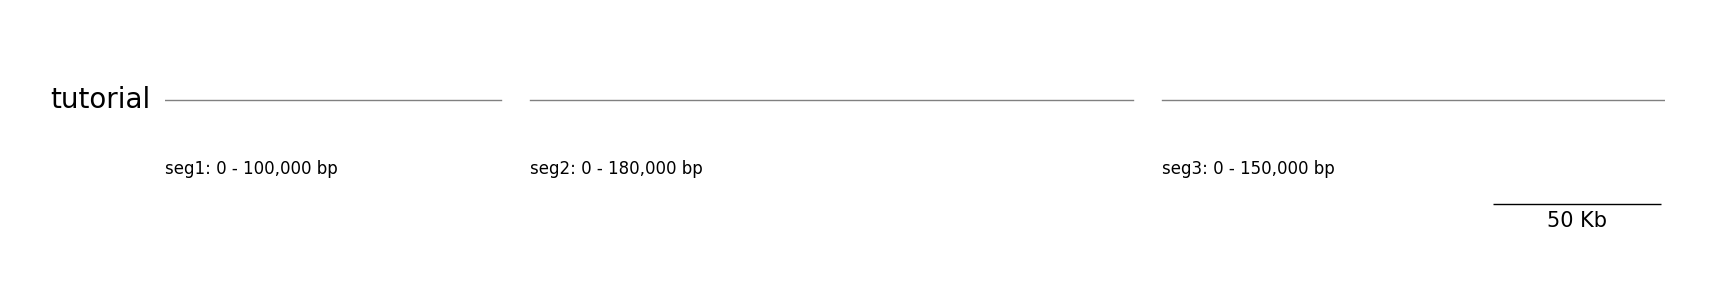

In [5]:
from pygenomeviz import GenomeViz

gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

# Set multi segments on track
genome_size_list = (100000, 180000, 150000)
track = gv.add_feature_track("tutorial", genome_size_list)

for segment in track.segments:
    segment.add_sublabel(f"{segment.name}: {segment.start:,} - {segment.end:,} bp")

fig = gv.plotfig()

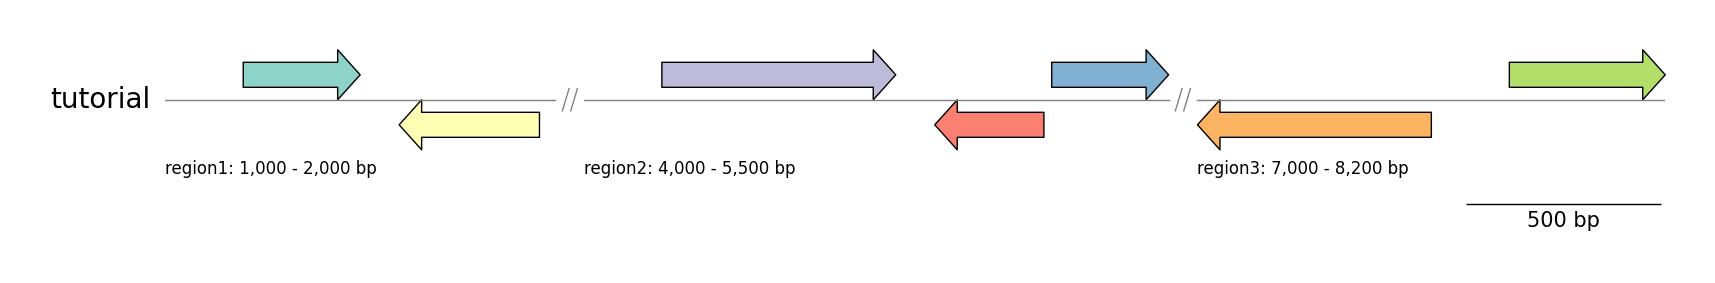

In [6]:
from pygenomeviz import GenomeViz
from pygenomeviz.utils import ColorCycler
ColorCycler.set_cmap("Set3")

features = ((1200, 1500, 1), (1600, 1960, -1), (4200, 4800, 1), (4900, 5180, -1), (5200, 5500, 1), (7000, 7600, -1), (7800, 8200, 1))

gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

# Set multi segments on track
target_regions = dict(region1=(1000, 2000), region2=(4000, 5500), region3=(7000, 8200))
track = gv.add_feature_track("tutorial", target_regions)
track.set_segment_sep()

for segment in track.segments:
    segment.add_sublabel(f"{segment.name}: {segment.start:,} - {segment.end:,} bp")
    # Add feature to segment
    for feature in features:
        start, end, strand = feature
        if segment.start <= start <= end <= segment.end:
            segment.add_feature(start, end, strand, fc=ColorCycler(), lw=1.0)

fig = gv.plotfig()

### 1-6. Exon Features

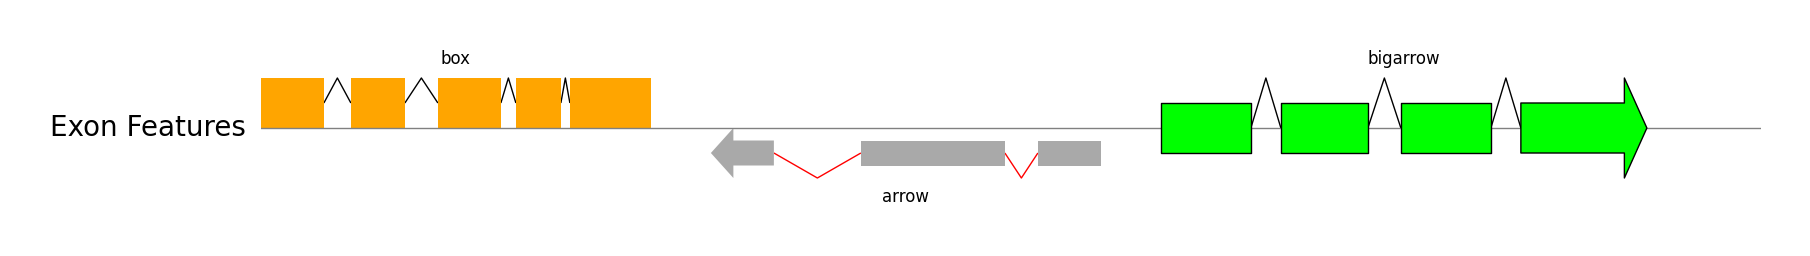

In [7]:
from pygenomeviz import GenomeViz

exon_regions1 = [(0, 210), (300, 480), (590, 800), (850, 1000), (1030, 1300)]
exon_regions2 = [(1500, 1710), (2000, 2480), (2590, 2800)]
exon_regions3 = [(3000, 3300), (3400, 3690), (3800, 4100), (4200, 4620)]

gv = GenomeViz()
track = gv.add_feature_track("Exon Features", 5000)

# Add exon features
track.add_exon_feature(exon_regions1, strand=1, plotstyle="box", label="box", text_kws=dict(rotation=0, hpos="center"))
track.add_exon_feature(exon_regions2, strand=-1, plotstyle="arrow", label="arrow", text_kws=dict(rotation=0, vpos="bottom", hpos="center"), patch_kws=dict(fc="darkgrey"), intron_patch_kws=dict(ec="red"))
track.add_exon_feature(exon_regions3, strand=1, plotstyle="bigarrow", label="bigarrow", text_kws=dict(rotation=0, hpos="center"), patch_kws=dict(fc="lime", lw=1))

fig = gv.plotfig()

### 1-7. Tracks

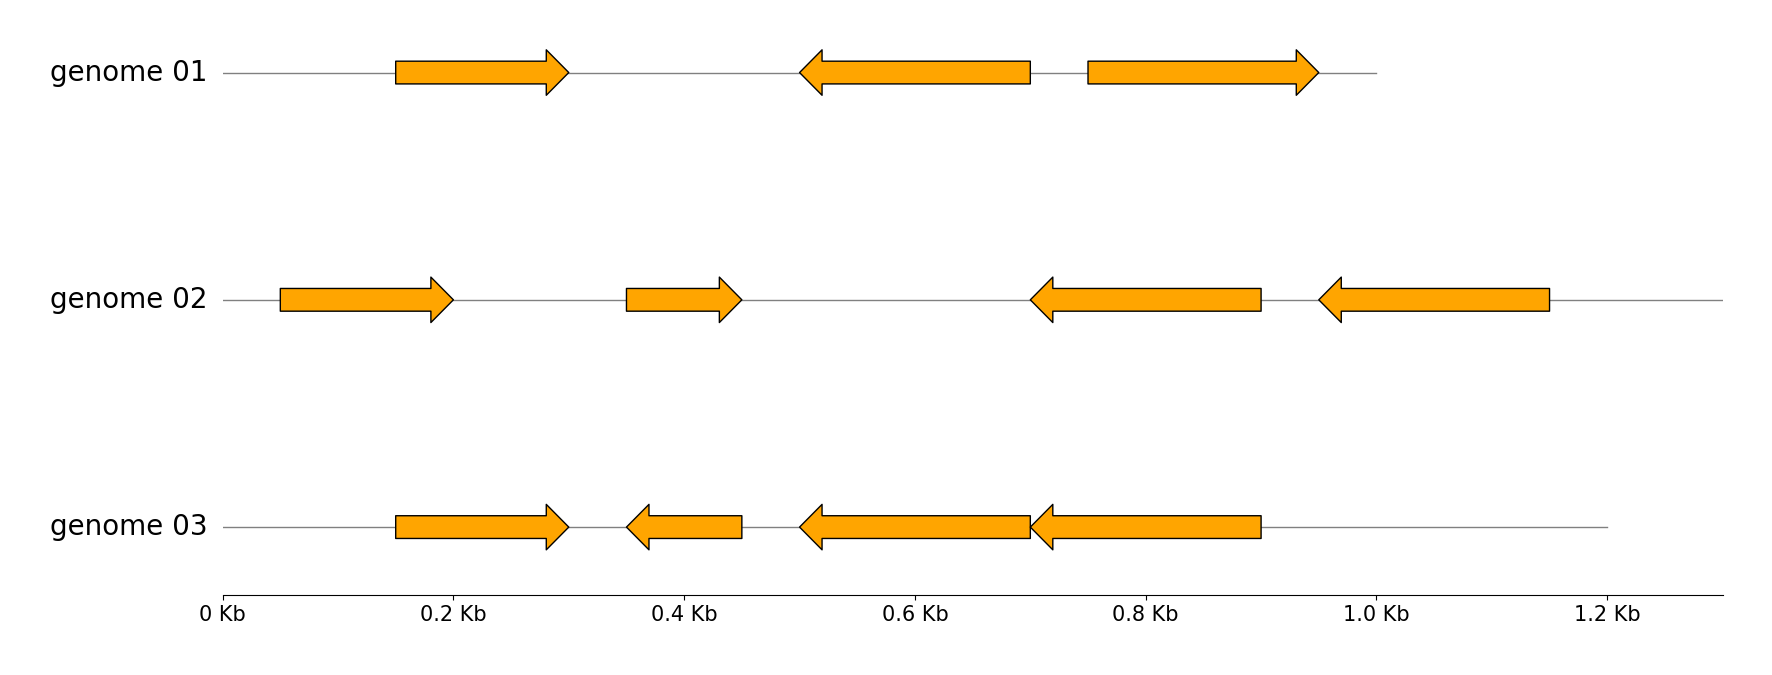

In [8]:
from pygenomeviz import GenomeViz

genome_list = [
    dict(name="genome 01", size=1000, features=((150, 300, 1), (500, 700, -1), (750, 950, 1))),
    dict(name="genome 02", size=1300, features=((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))),
    dict(name="genome 03", size=1200, features=((150, 300, 1), (350, 450, -1), (500, 700, -1), (700, 900, -1))),
]

gv = GenomeViz()
gv.set_scale_xticks()

# Set multi tracks & features
for genome in genome_list:
    name, size, features = genome["name"], genome["size"], genome["features"]
    track = gv.add_feature_track(name, size)
    for feature in features:
        start, end, strand = feature
        track.add_feature(start, end, strand, plotstyle="bigarrow", lw=1.0)

fig = gv.plotfig()

### 1-8. Tracks & Links

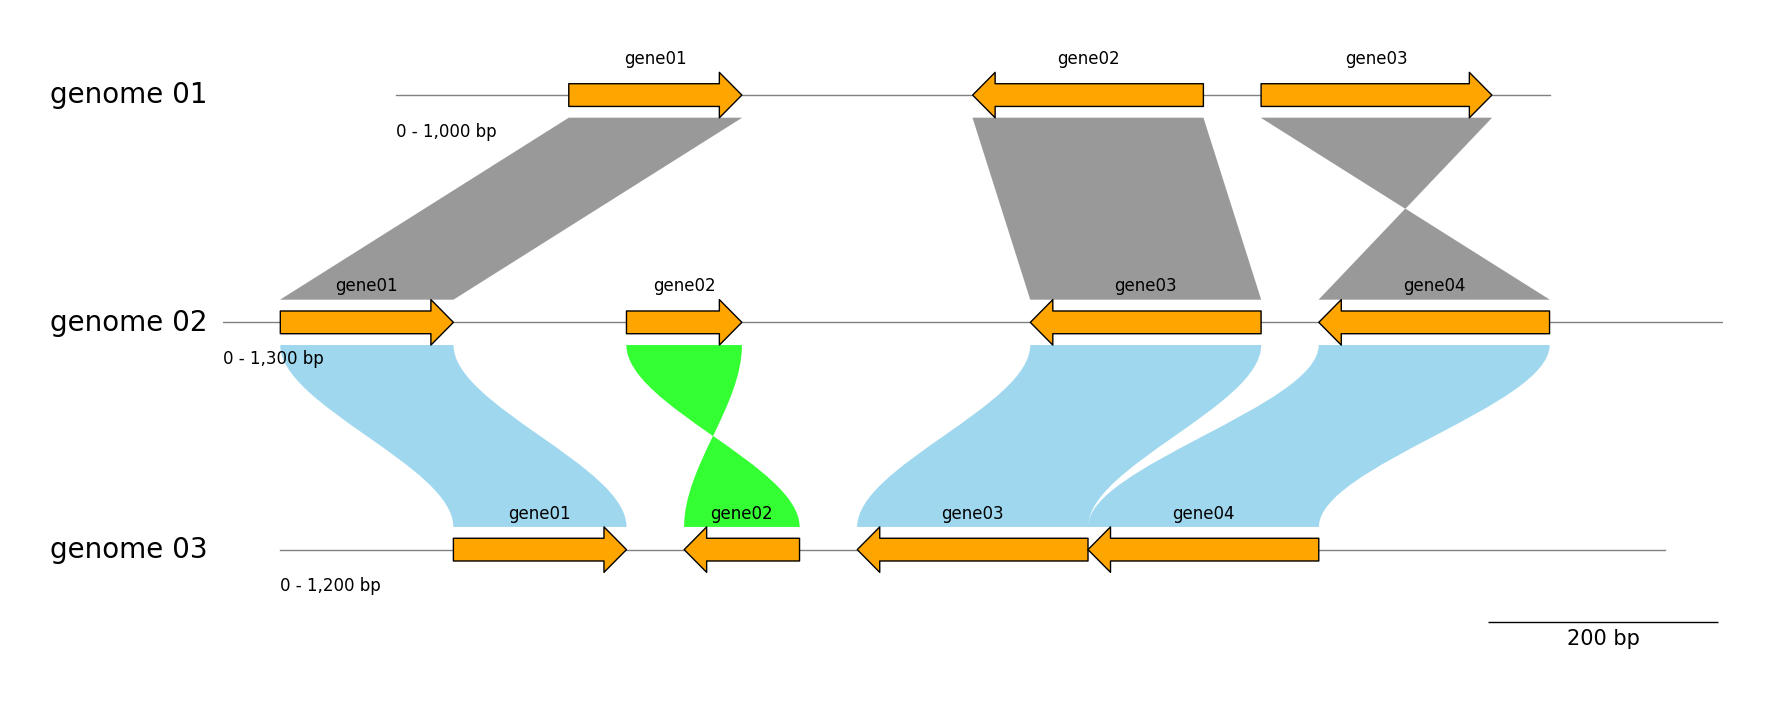

In [9]:
from pygenomeviz import GenomeViz

genome_list = [
    dict(name="genome 01", size=1000, features=((150, 300, 1), (500, 700, -1), (750, 950, 1))),
    dict(name="genome 02", size=1300, features=((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))),
    dict(name="genome 03", size=1200, features=((150, 300, 1), (350, 450, -1), (500, 700, -1), (700, 900, -1))),
]

gv = GenomeViz(track_align_type="center")
gv.set_scale_bar()

# Set multi tracks & features
for genome in genome_list:
    name, size, features = genome["name"], genome["size"], genome["features"]
    track = gv.add_feature_track(name, size)
    track.add_sublabel()
    for idx, feature in enumerate(features, 1):
        start, end, strand = feature
        track.add_feature(start, end, strand, plotstyle="bigarrow", lw=1, label=f"gene{idx:02d}", text_kws=dict(rotation=0, vpos="top", hpos="center"))

# Add links between "genome 01" and "genome 02"
gv.add_link(("genome 01", 150, 300), ("genome 02", 50, 200))
gv.add_link(("genome 01", 700, 500), ("genome 02", 900, 700))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Add links between "genome 02" and "genome 03"
gv.add_link(("genome 02", 50, 200), ("genome 03", 150, 300), color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 02", 900, 700), ("genome 03", 700, 500), color="skyblue", inverted_color="lime", curve=True)
gv.add_link(("genome 03", 900, 700), ("genome 02", 1150, 950), color="skyblue", inverted_color="lime", curve=True)

fig = gv.plotfig()

### 1-9. Chromosomes

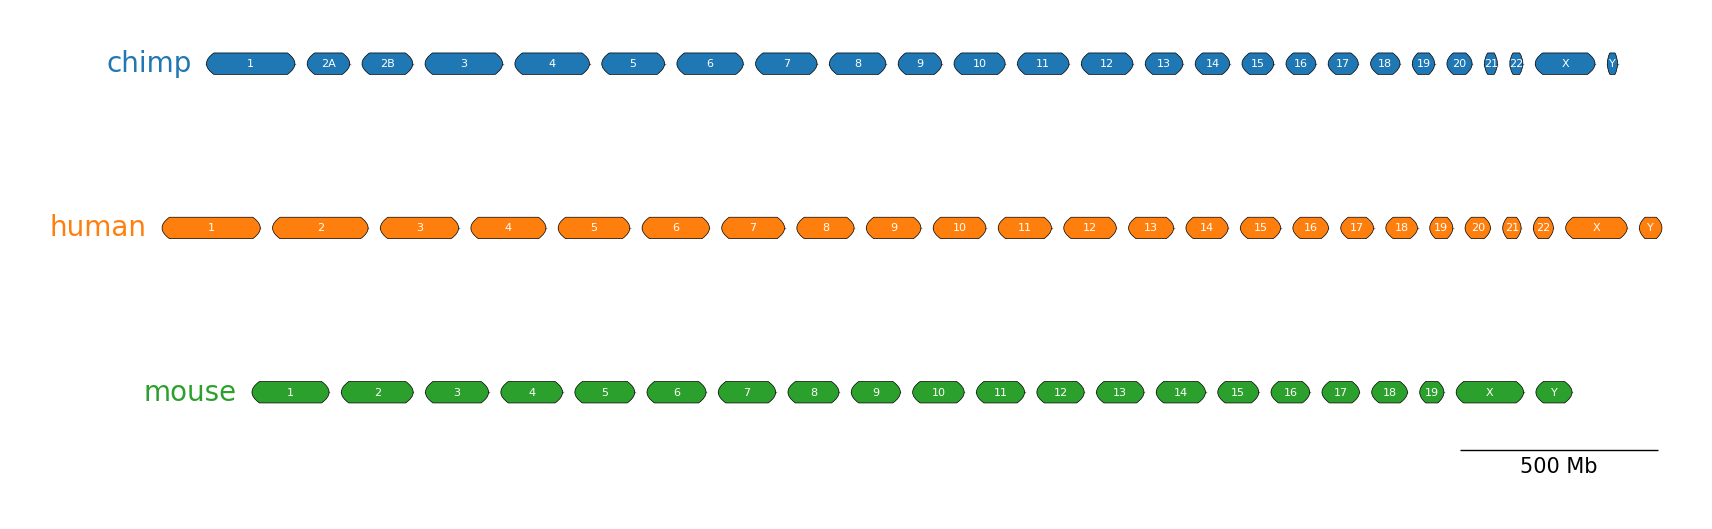

In [10]:
from pygenomeviz import GenomeViz
from pygenomeviz.utils import ColorCycler
ColorCycler.set_cmap("tab10")

name2chr_segments = dict(
    chimp=dict(chr1=224244399, chr2A=108022953, chr2B=128755405, chr3=196562556, chr4=189151597, chr5=159319378, chr6=168369391, chr7=156046543, chr8=143338810, chr9=110513671, chr10=129809613, chr11=130782606, chr12=130995916, chr13=95599650, chr14=87716528, chr15=80519282, chr16=75912362, chr17=76554115, chr18=74774469, chr19=56733099, chr20=64035432, chr21=33232379, chr22=33698415, chrX=151576176, chrY=26350515),
    human=dict(chr1=248956422, chr2=242193529, chr3=198295559, chr4=190214555, chr5=181538259, chr6=170805979, chr7=159345973, chr8=145138636, chr9=138394717, chr10=133797422, chr11=135086622, chr12=133275309, chr13=114364328, chr14=107043718, chr15=101991189, chr16=90338345, chr17=83257441, chr18=80373285, chr19=58617616, chr20=64444167, chr21=46709983, chr22=50818468, chrX=156040895, chrY=57227415),
    mouse=dict(chr1=195471971, chr2=182113224, chr3=160039680, chr4=156508116, chr5=151834684, chr6=149736546, chr7=145441459, chr8=129401213, chr9=124595110, chr10=130694993, chr11=122082543, chr12=120129022, chr13=120421639, chr14=124902244, chr15=104043685, chr16=98207768, chr17=94987271, chr18=90702639, chr19=61431566, chrX=171031299, chrY=91744698),
)

gv = GenomeViz(fig_track_height=0.7, feature_track_ratio=0.15, track_align_type="center")
gv.set_scale_bar(ymargin=2)

for name, chr_segments in name2chr_segments.items():
    color = ColorCycler()
    # Set chromosomes as segments
    track = gv.add_feature_track(
        name, chr_segments, space=0.01, align_label=False, label_kws=dict(color=color),
    )
    for seg in track.segments:
        seg.add_feature(
            seg.start,
            seg.end,
            plotstyle="bigrbox",
            fc=color,
            ec="black",
            lw=0.5,
            label=seg.name.replace("chr", ""),
            text_kws=dict(rotation=0, size=8, color="white", vpos="center", hpos="center"),
        )

fig = gv.plotfig()

## 2. Intermediate Content

pyGenomeViz supports genomic feature plots of Genbank and GFF files.

### 2-1. Genbank

#### 2-1-1. Features

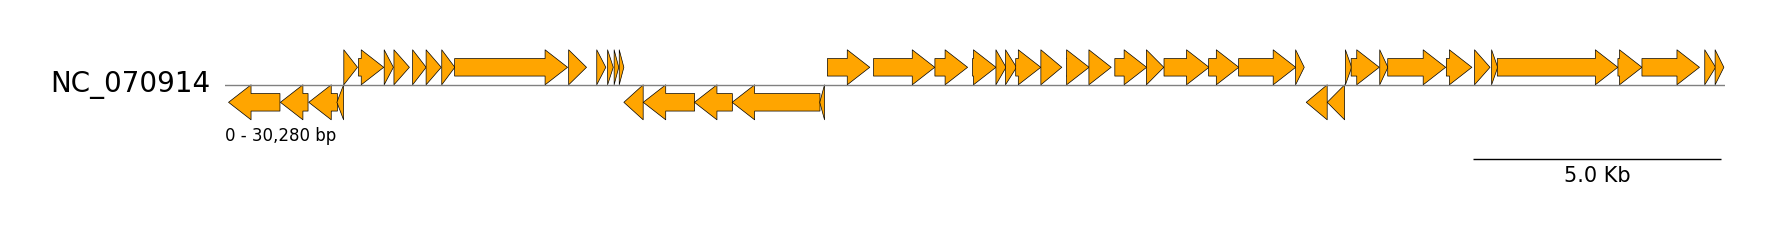

In [11]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset

gbk_files = load_example_genbank_dataset("yersinia_phage")
gbk = Genbank(gbk_files[0])

gv = GenomeViz(fig_track_height=0.7)
gv.set_scale_bar(ymargin=0.5)

track = gv.add_feature_track(gbk.name, gbk.genome_length)
track.add_sublabel()

# Plot genbank features
features = gbk.extract_features()
track.add_features(features, lw=0.5)

fig = gv.plotfig()

#### 2-1-2. Tracks

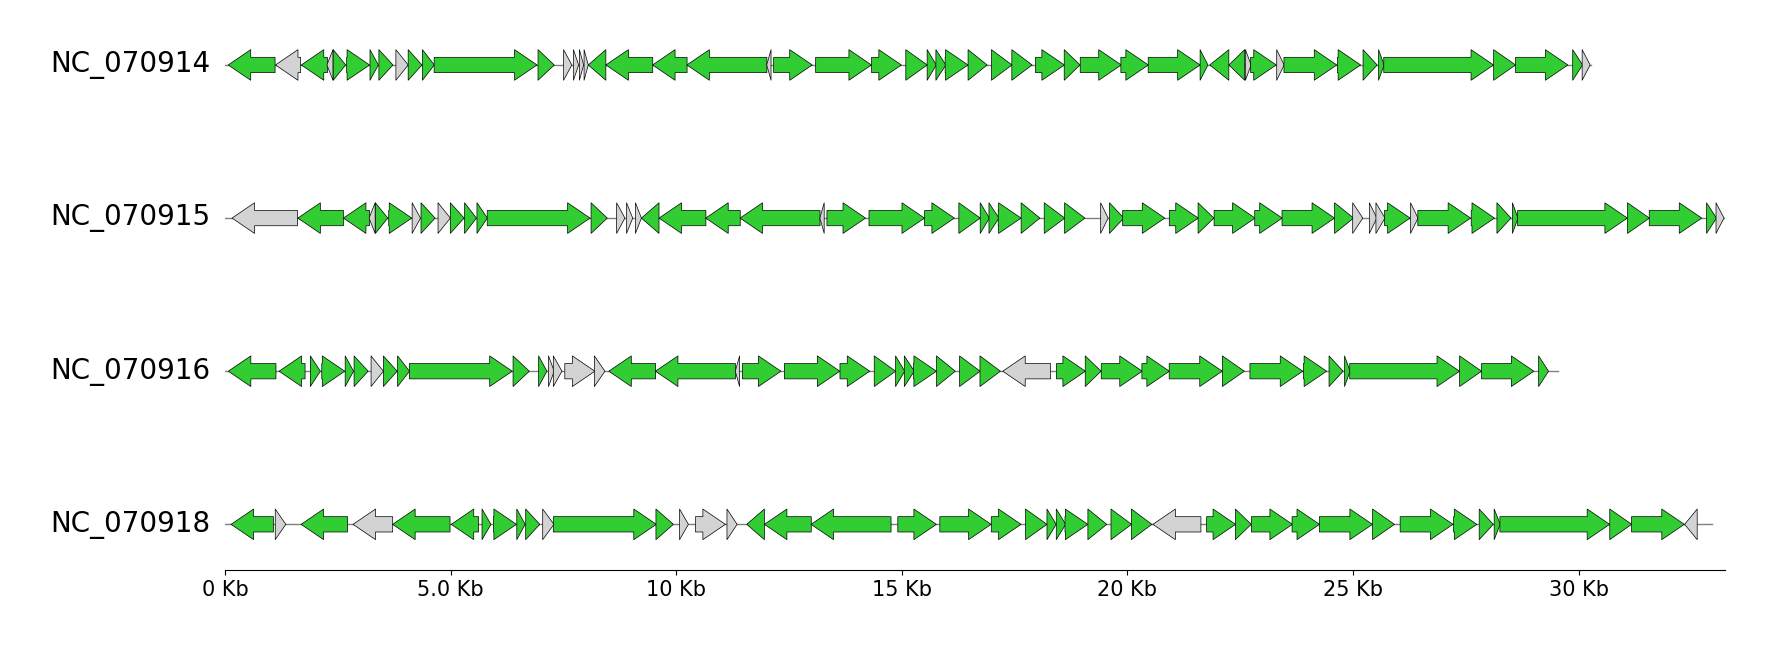

In [12]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset

gbk_files = load_example_genbank_dataset("yersinia_phage")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(fig_track_height=0.7)
gv.set_scale_xticks()

for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.genome_length)

    # Plot genbank features
    features = gbk.extract_features()
    for feature in features:
        # Set user-defined feature color based on product name
        product = str(feature.qualifiers.get("product", [""])[0])
        color = "lightgrey" if  product.startswith("hypothetical") else "limegreen"
        track.add_features(feature, plotstyle="bigarrow", fc=color, lw=0.5)

fig = gv.plotfig()

#### 2-1-3. Contigs per Segment

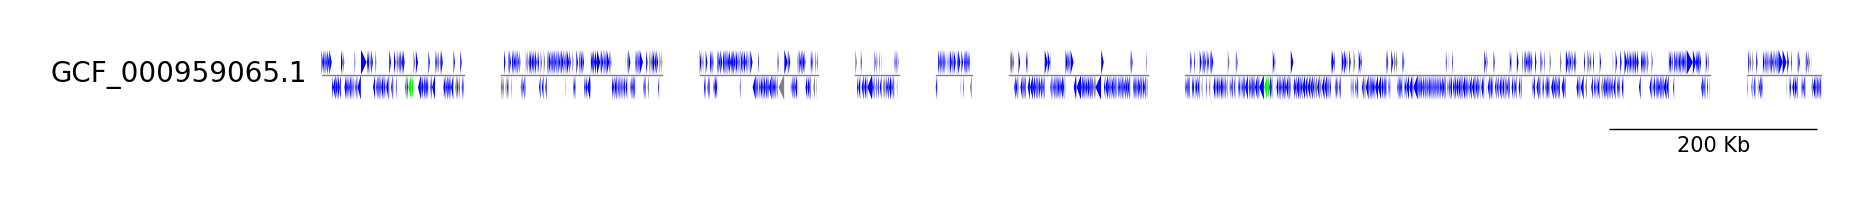

In [13]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset, is_pseudo_feature

gbk_files = load_example_genbank_dataset("mycoplasma_mycoides")
gbk = Genbank(gbk_files[-1])

gv = GenomeViz(fig_track_height=0.5)
gv.set_scale_bar(ymargin=0.5)

# Set contigs as segments
track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), space=0.03)

seqid2features = gbk.get_seqid2features(feature_type=None)
for segment in track.segments:
    # Plot contig features per segment
    features = seqid2features[segment.name]
    for feature in features:
        # Set user-defined feature color based on feature type & pseudo tag
        if feature.type == "CDS":
            color = "grey" if is_pseudo_feature(feature) else "blue"
            segment.add_features(feature, color=color)
        elif feature.type == "rRNA":
            segment.add_features(feature, color="lime")

fig = gv.plotfig()

#### 2-1-4. Chromosomes

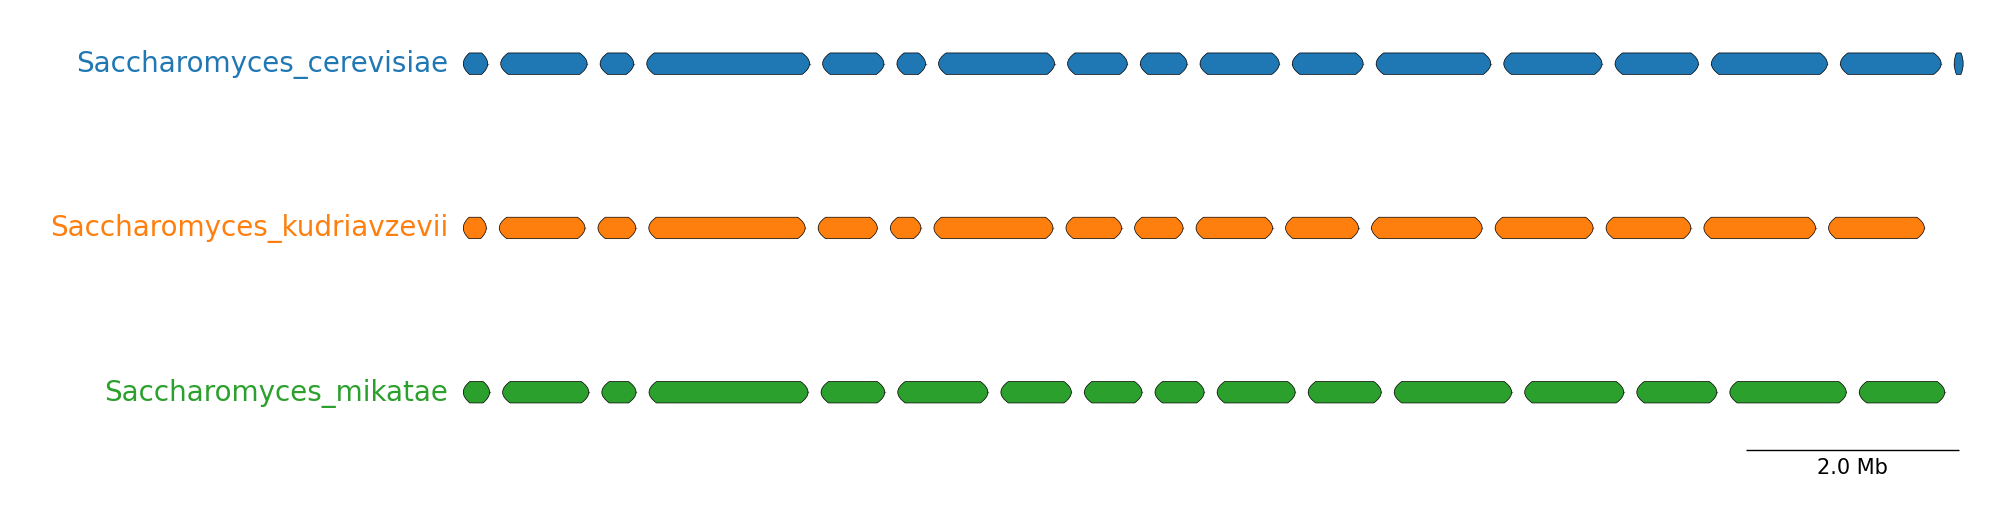

In [14]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset, ColorCycler
ColorCycler.set_cmap("tab10")

gbk_files = load_example_genbank_dataset("saccharomyces")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(fig_track_height=0.7, feature_track_ratio=0.15)
gv.set_scale_bar(ymargin=2.0)

for gbk in gbk_list:
    color = ColorCycler()
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), space=0.01, label_kws=dict(color=color))
    for segment in track.segments:
        segment.add_feature(segment.start, segment.end, plotstyle="bigrbox", fc=color, lw=0.5)

fig = gv.plotfig()

### 2-2. GFF

#### 2-2-1. Features

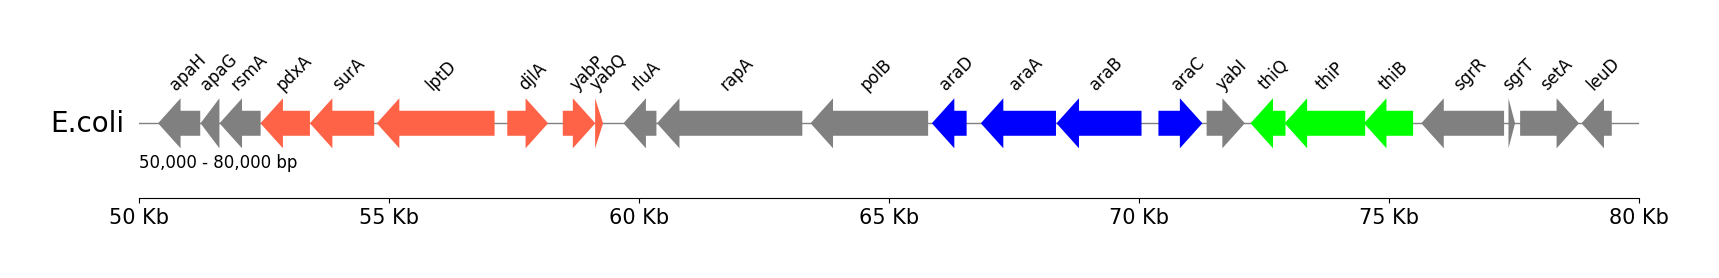

In [15]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file

gff_file = load_example_gff_file("escherichia_coli.gff.gz")
gff = Gff(gff_file)

gv = GenomeViz(fig_track_height=0.5)
gv.set_scale_xticks(start=50000)

track = gv.add_feature_track(name="E.coli", segments=(50000, 80000))
track.add_sublabel()

segment = track.get_segment()
for feature in gff.extract_features("CDS", target_range=segment.range):
    # Get gene name in GFF attributes column (e.g. `gene=araD;`)
    gene_name = str(feature.qualifiers.get("gene", [""])[0])
    # Set user-defined feature color based on gene name
    if gene_name.startswith("ara"):
        color = "blue"
    elif gene_name.startswith("thi"):
        color = "lime"
    elif gene_name in ("pdxA", "surA", "lptD", "djlA", "yabP", "yabQ"):
        color = "tomato"
    else:
        color = "grey"
    segment.add_features(feature, plotstyle="bigarrow", color=color, label_type="gene")

fig = gv.plotfig()

#### 2-2-2. Features in Segments

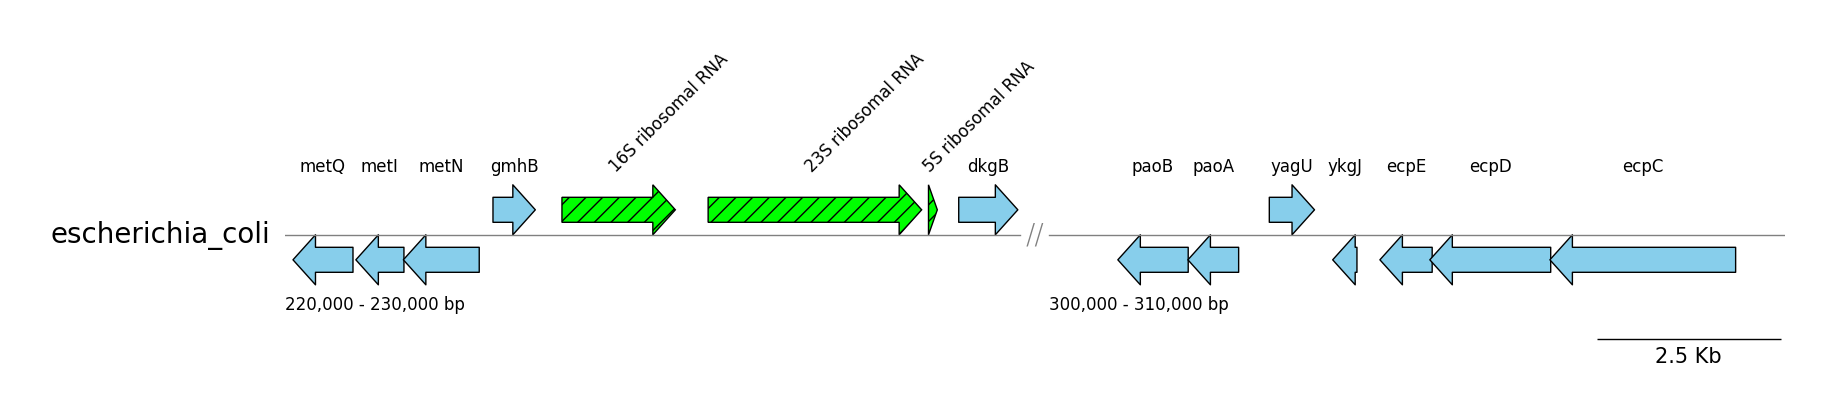

In [16]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file

gff_file = load_example_gff_file("escherichia_coli.gff.gz")
gff = Gff(gff_file)

gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

target_ranges = [(220000, 230000), (300000, 310000)]
track = gv.add_feature_track(name=gff.name, segments=target_ranges)
track.set_segment_sep()

for segment in track.segments:
    segment.add_sublabel()
    # Plot CDS features
    cds_features = gff.extract_features(feature_type="CDS", target_range=segment.range)
    segment.add_features(cds_features, label_type="gene", fc="skyblue", lw=1.0, text_kws=dict(rotation=0, hpos="center"))
    # Plot rRNA features
    rrna_features = gff.extract_features(feature_type="rRNA", target_range=segment.range)
    segment.add_features(rrna_features, label_type="product", hatch="//", fc="lime", lw=1.0)

fig = gv.plotfig()

#### 2-2-3. Contigs per Track

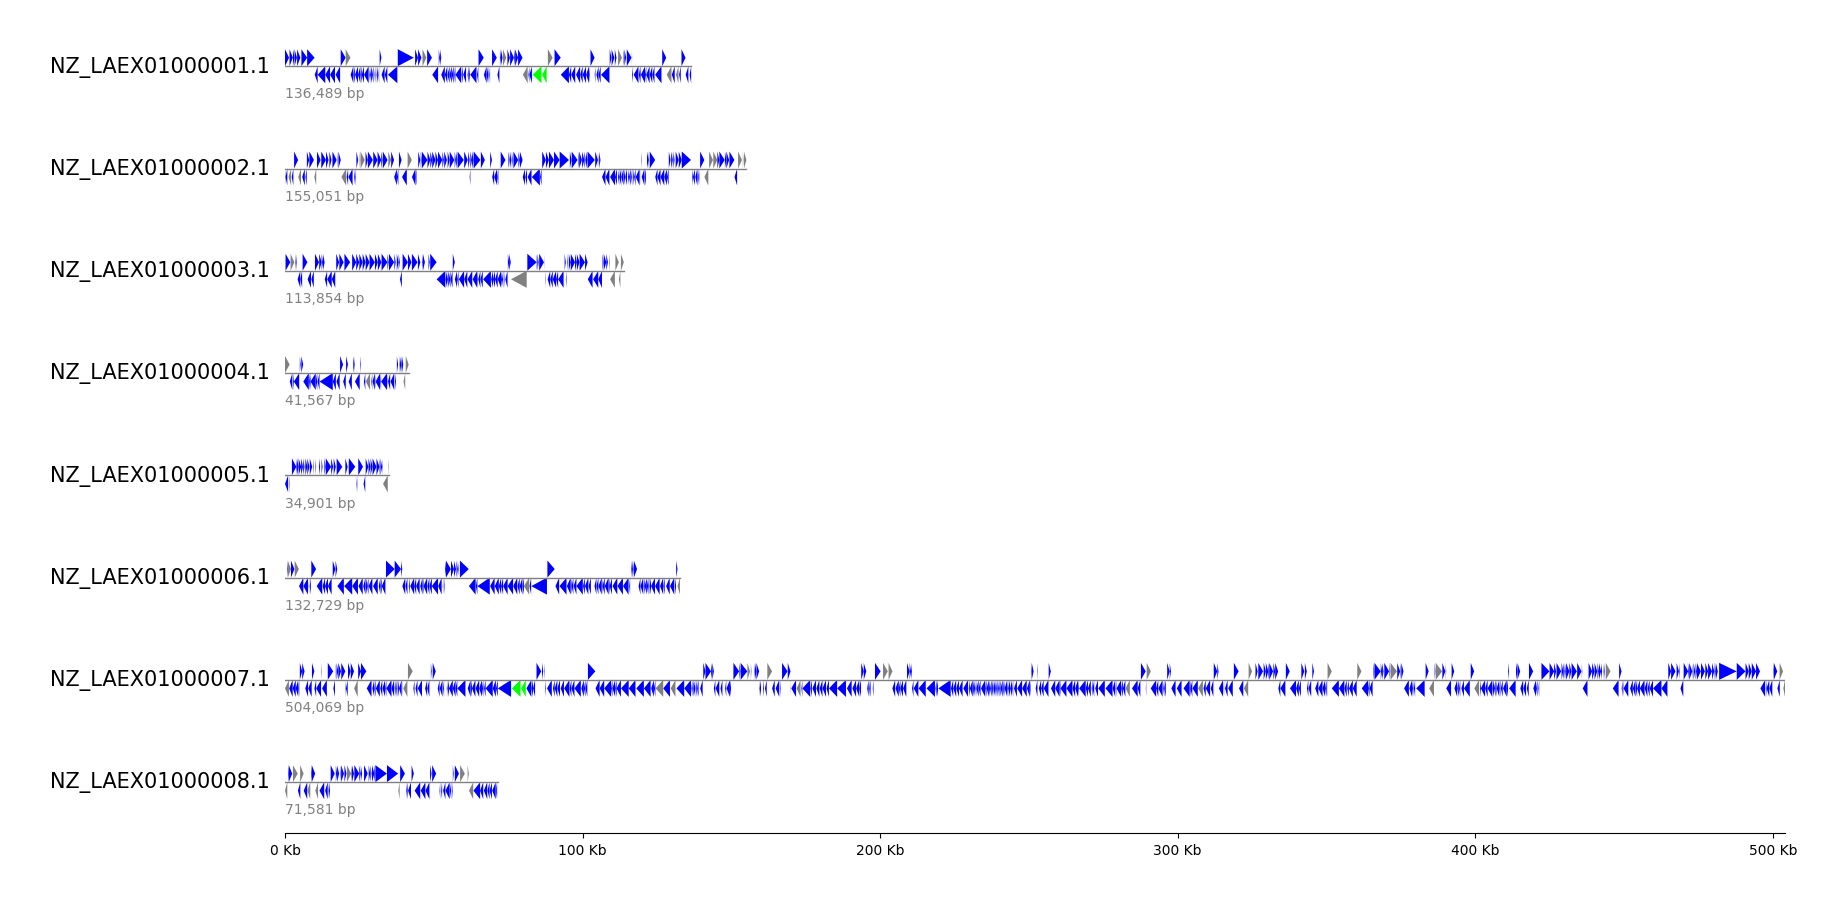

In [17]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff
from pygenomeviz.utils import load_example_gff_file, is_pseudo_feature

gff_file = load_example_gff_file("mycoplasma_mycoides.gff")
gff = Gff(gff_file)

gv = GenomeViz(fig_track_height=0.5, feature_track_ratio=0.5)
gv.set_scale_xticks(labelsize=10)

# Plot CDS, rRNA features for each contig to tracks
for seqid, size in gff.get_seqid2size().items():
    track = gv.add_feature_track(seqid, size, labelsize=15)
    track.add_sublabel(f"{size:,} bp", size=10, color="grey")
    cds_features = gff.get_seqid2features(feature_type="CDS")[seqid]
    # CDS: blue, CDS(pseudo): grey
    for cds_feature in cds_features:
        color = "grey" if is_pseudo_feature(cds_feature) else "blue"
        track.add_features(cds_feature, color=color)
    # rRNA: lime
    rrna_features = gff.get_seqid2features(feature_type="rRNA")[seqid]
    track.add_features(rrna_features, color="lime")

fig = gv.plotfig()

## 3. Advanced Content

pyGenomeViz supports aligning genomes between Genbank files and plotting the alignment result links.
Users can select BLAST, MMseqs, and MUMmer as aligner tools.

### 3-1. BLAST Comparison

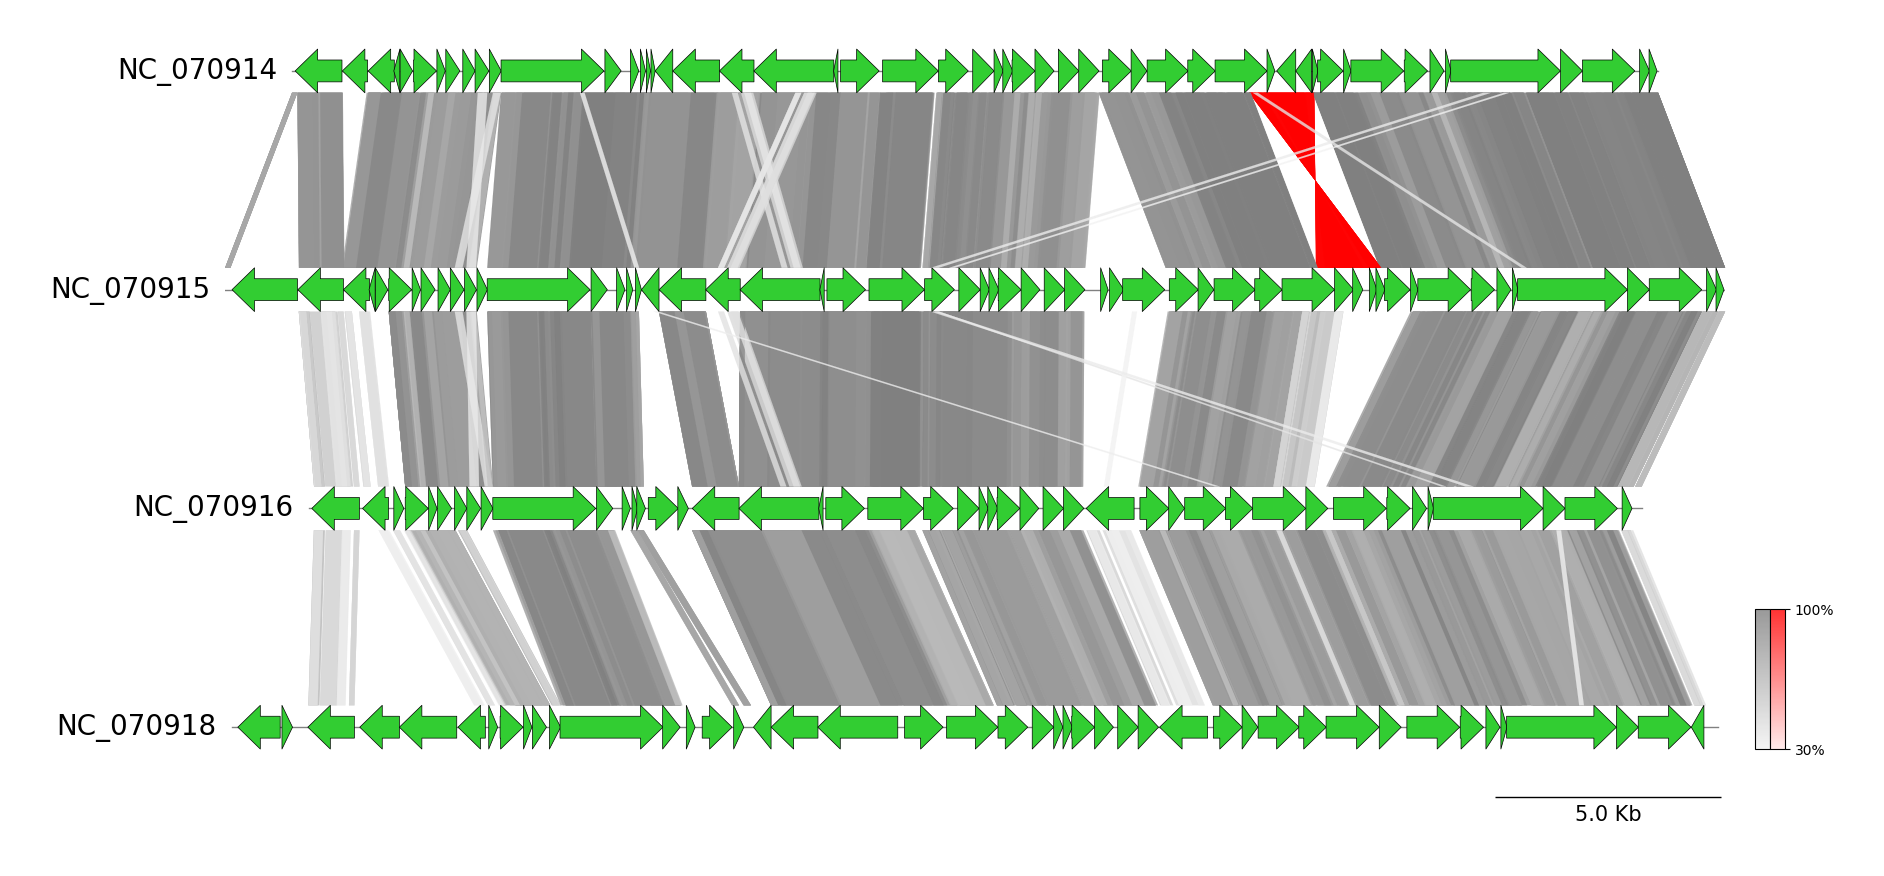

In [18]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset
from pygenomeviz.align import Blast, AlignCoord

gbk_files = load_example_genbank_dataset("yersinia_phage")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(track_align_type="center")
gv.set_scale_bar()

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        segment.add_features(features, plotstyle="bigarrow", fc="limegreen", lw=0.5)

# Run BLAST alignment & filter by user-defined threshold
align_coords = Blast(gbk_list, seqtype="protein").run()
align_coords = AlignCoord.filter(align_coords, length_thr=100, identity_thr=30)

# Plot BLAST alignment links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "grey", "red"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()

### 3-2. MMseqs Comparison

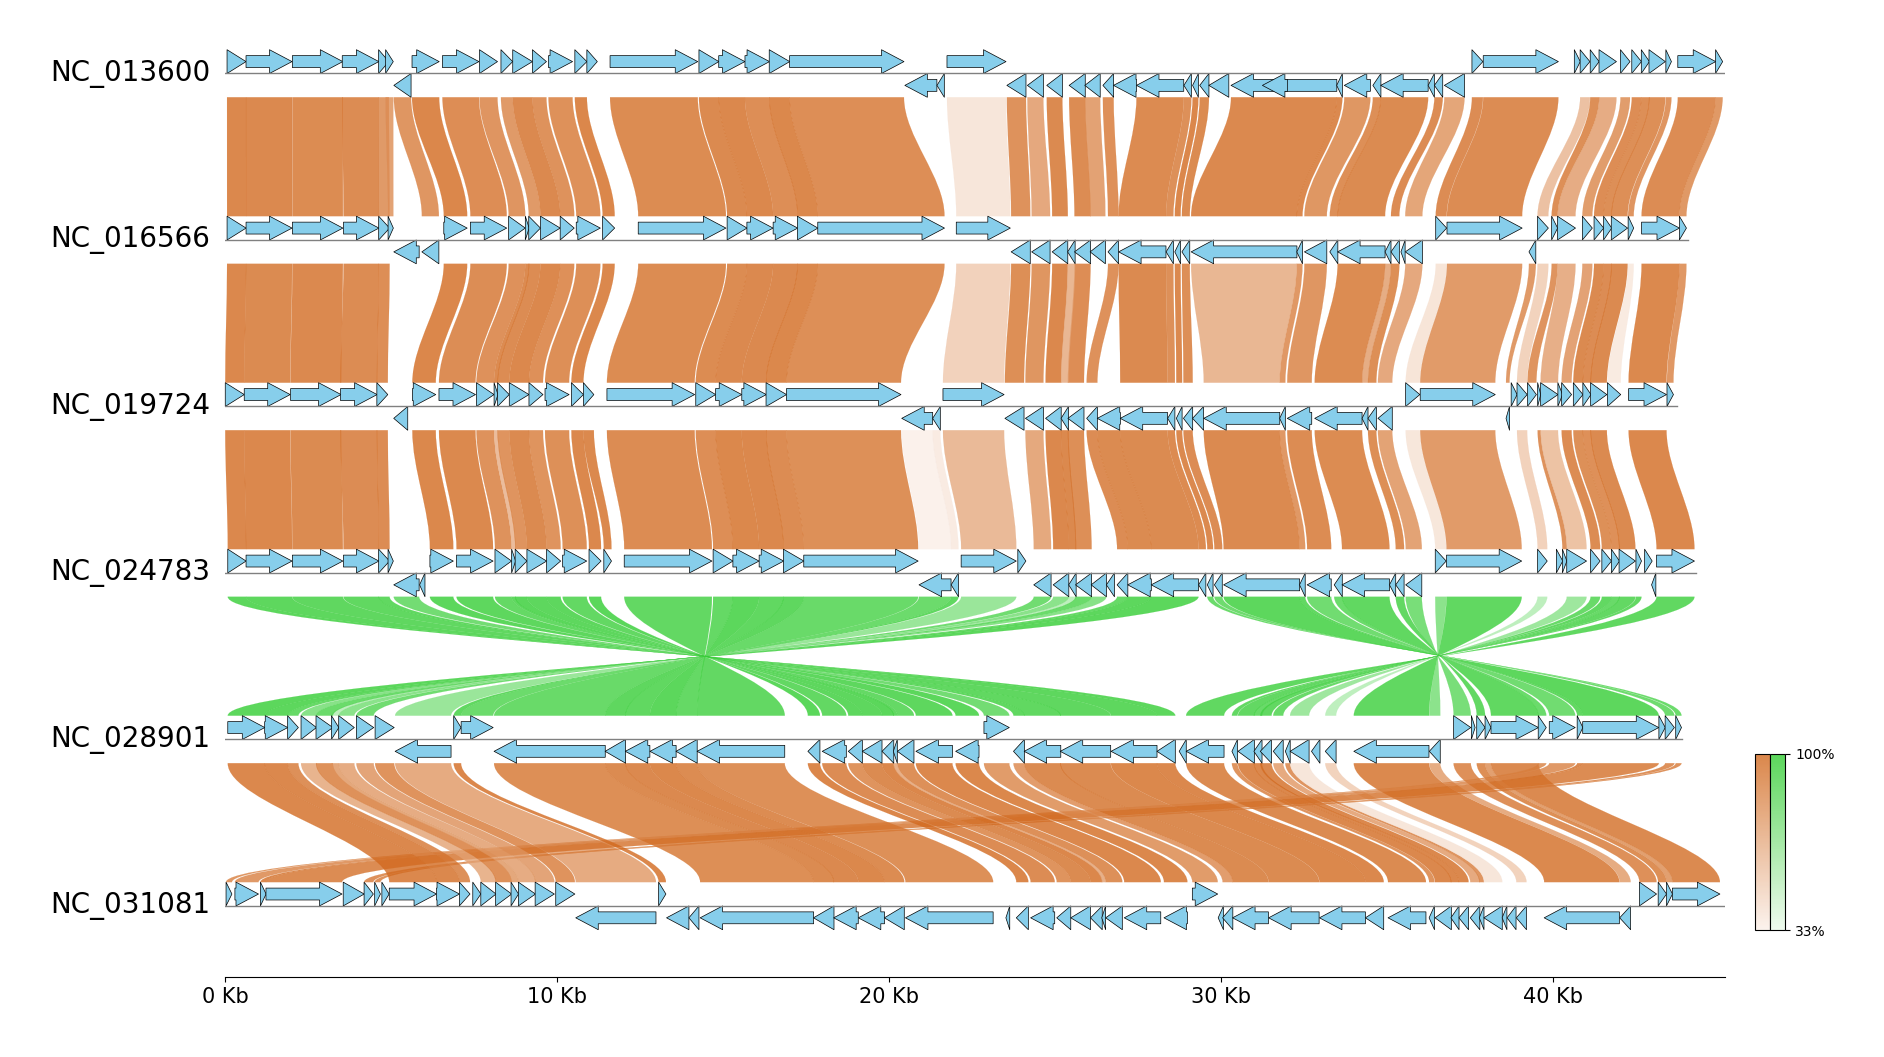

In [19]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset
from pygenomeviz.align import MMseqs

gbk_files = load_example_genbank_dataset("enterobacteria_phage")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz(fig_track_height=0.8, feature_track_ratio=0.4)
gv.set_scale_xticks()

# Plot CDS features
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features("CDS").items():
        segment = track.get_segment(seqid)
        segment.add_features(features, fc="skyblue", lw=0.5)

# Run MMseqs RBH search
align_coords = MMseqs(gbk_list).run()

# Plot MMseqs RBH search links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "chocolate", "limegreen"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident, curve=True)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()

### 3-3. MUMmer Comparison

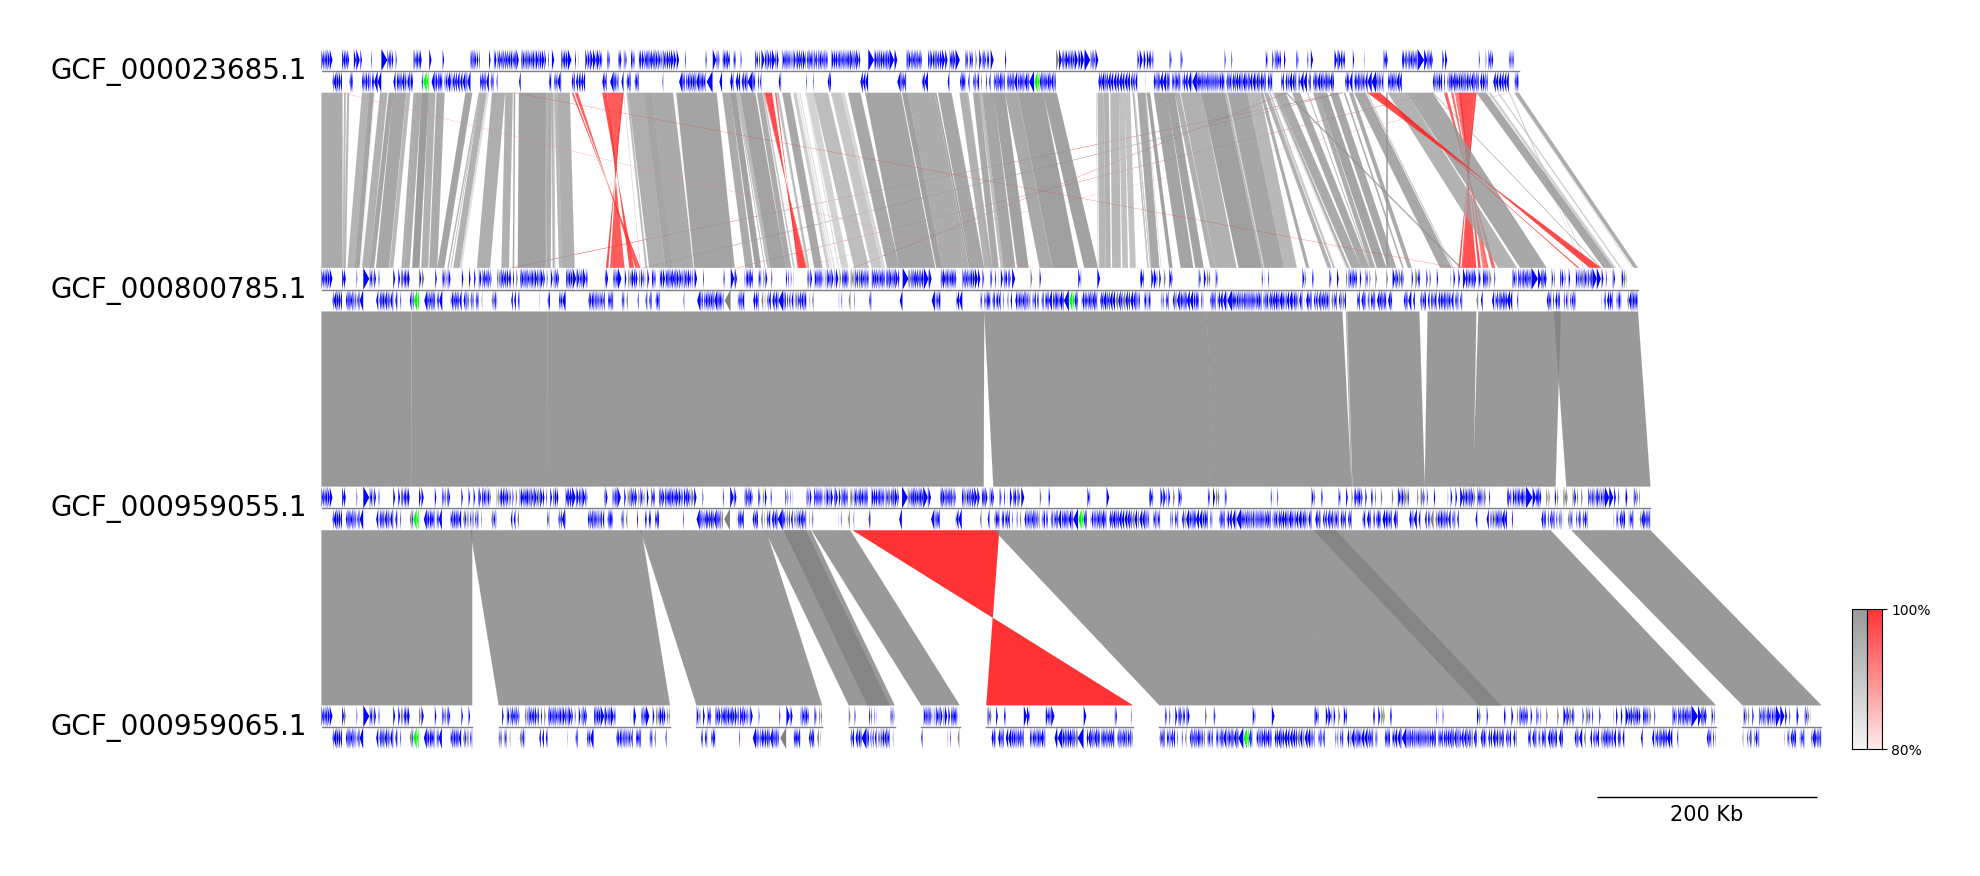

In [20]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Genbank
from pygenomeviz.utils import load_example_genbank_dataset, is_pseudo_feature
from pygenomeviz.align import MUMmer

gbk_files = load_example_genbank_dataset("mycoplasma_mycoides")
gbk_list = list(map(Genbank, gbk_files))

gv = GenomeViz()
gv.set_scale_bar()

# Plot CDS, rRNA features for each contig to tracks
for gbk in gbk_list:
    track = gv.add_feature_track(gbk.name, gbk.get_seqid2size(), align_label=False)
    for seqid, features in gbk.get_seqid2features(None).items():
        segment = track.get_segment(seqid)
        for feature in features:
            if feature.type == "CDS":
                # CDS: blue, CDS(pseudo): grey
                color = "grey" if is_pseudo_feature(feature) else "blue"
                segment.add_features(feature, fc=color)
            elif feature.type == "rRNA":
                # rRNA: lime
                segment.add_features(feature, fc="lime")

# Run MUMmer alignment
align_coords = MUMmer(gbk_list).run()

# Plot MUMmer alignment links
if len(align_coords) > 0:
    min_ident = int(min([ac.identity for ac in align_coords if ac.identity]))
    color, inverted_color = "grey", "red"
    for ac in align_coords:
        gv.add_link(ac.query_link, ac.ref_link, color=color, inverted_color=inverted_color, v=ac.identity, vmin=min_ident)
    gv.set_colorbar([color, inverted_color], vmin=min_ident)

fig = gv.plotfig()